In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# don't forget to import random forest model

In [34]:
ls


Untitled.ipynb
clean_quality_inr.csv
new_rf_order_quality_df.csv
order_train.csv
prelimEDA.ipynb
product_df.csv
python_to_R_translate.R
quality_df.csv
randomforest_featureimportance_qualityorder.ipynb
rf_order_quality_df.csv
user_df.csv


In [35]:
# We train a random forest to determine feature importance based on quality data set
# First we load in the data set cleaned from R
rf_df = pd.read_csv("new_rf_order_quality_df.csv")
print('size of rf_df:', rf_df.shape)

size of rf_df: (277759, 36)


In [36]:
rf_df.head()

,application_type,op_type,col_type,user_loan_experience,user_has_car,user_social_security,qid77,user_work_period,loan_limit_n,op_type_n,...,mobile_quality,standard_type,guarantee_type,user_income_by_card_bucket,application_term_buckets,app_limit_buckets,date_buckets,term_buckets,limit_buckets,result
0,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,48,10,0
1,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,12,10,0
2,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,12,4,0
3,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,24,10,0
4,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,12,101,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
randomForest = RandomForestClassifier()

In [16]:
rf_df.iloc[:, 0:35]

,application_type,op_type,col_type,user_loan_experience,user_has_car,user_social_security,qid77,user_work_period,loan_limit_n,op_type_n,...,mobile_is_paid,mobile_quality,standard_type,guarantee_type,user_income_by_card_bucket,application_term_buckets,app_limit_buckets,date_buckets,term_buckets,limit_buckets
0,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 48,<10
1,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 12,<10
2,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 12,< 4
3,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 24,<10
4,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 12,<101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277754,0,-999,-999,-999,-999,-999,-999,-999,5,2,...,0,1,-999,-999,unknown,< 10,< 6,time 14,term 12,<20
277755,0,-999,-999,-999,-999,-999,-999,-999,2,1,...,0,1,-999,-999,unknown,< 10,< 6,time 14,term 12,<10
277756,0,-999,-999,-999,-999,-999,-999,-999,2,1,...,0,1,-999,-999,unknown,< 10,< 6,time 15,term 12,<10
277757,9,4,0,1,5,0,3,12,4,1,...,0,0,1,2,under 1000,< 20,< 6,time 14,less than 100,< 4


In [37]:
rf_data = rf_df.iloc[:, 0:35]
rf_target = rf_df.iloc[:, 35]

In [19]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(rf_data, rf_target, test_size=0.2, random_state=0)

In [41]:
randomForest.set_params(random_state=0)

%time randomForest.fit(X_train, y_train) 
    
print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

CPU times: user 27.8 s, sys: 498 ms, total: 28.3 s
Wall time: 29.5 s
The training error is: 0.03221
The test     error is: 0.14491


In [65]:
feature_importance = list(zip(rf_data.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')#[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'guarantee_', b'standard_t', b'is_paid', b'product_ty', b'op_type_n']

(b'guarantee_', b'standard_t', b'is_paid', b'product_ty', b'op_type_n', b'qid77_n', b'mobile_is_', b'spam_score', b'user_socia', b'user_has_c', b'user_work_', b'qid77', b'user_socia', b'col_type_n', b'op_type', b'platform', b'user_loan_', b'mobile_qua', b'user_incom', b'mobile_ver', b'cash_recei', b'user_incom', b'quality', b'applicatio', b'user_age_n', b'user_has_c', b'applicatio', b'loan_limit', b'user_loan_', b'app_limit_', b'user_work_', b'col_type', b'term_bucke', b'limit_buck', b'date_bucke')
(0.010247056291000284, 0.010361993491126757, 0.011449636668235676, 0.011604365048101238, 0.012324616617410144, 0.012459569490259293, 0.012928246208761913, 0.014286907445597314, 0.015136894120001325, 0.016226231450070263, 0.0170805264843914, 0.01729521822808493, 0.017861698383343467, 0.019272274103162425, 0.01934826709441654, 0.020306807656738632, 0.021106507413779688, 0.021315606139099063, 0.027944821758944843, 0.028499288407020967, 0.03028637539404282, 0.030738001986245957, 0.03584783896268

<BarContainer object of 35 artists>

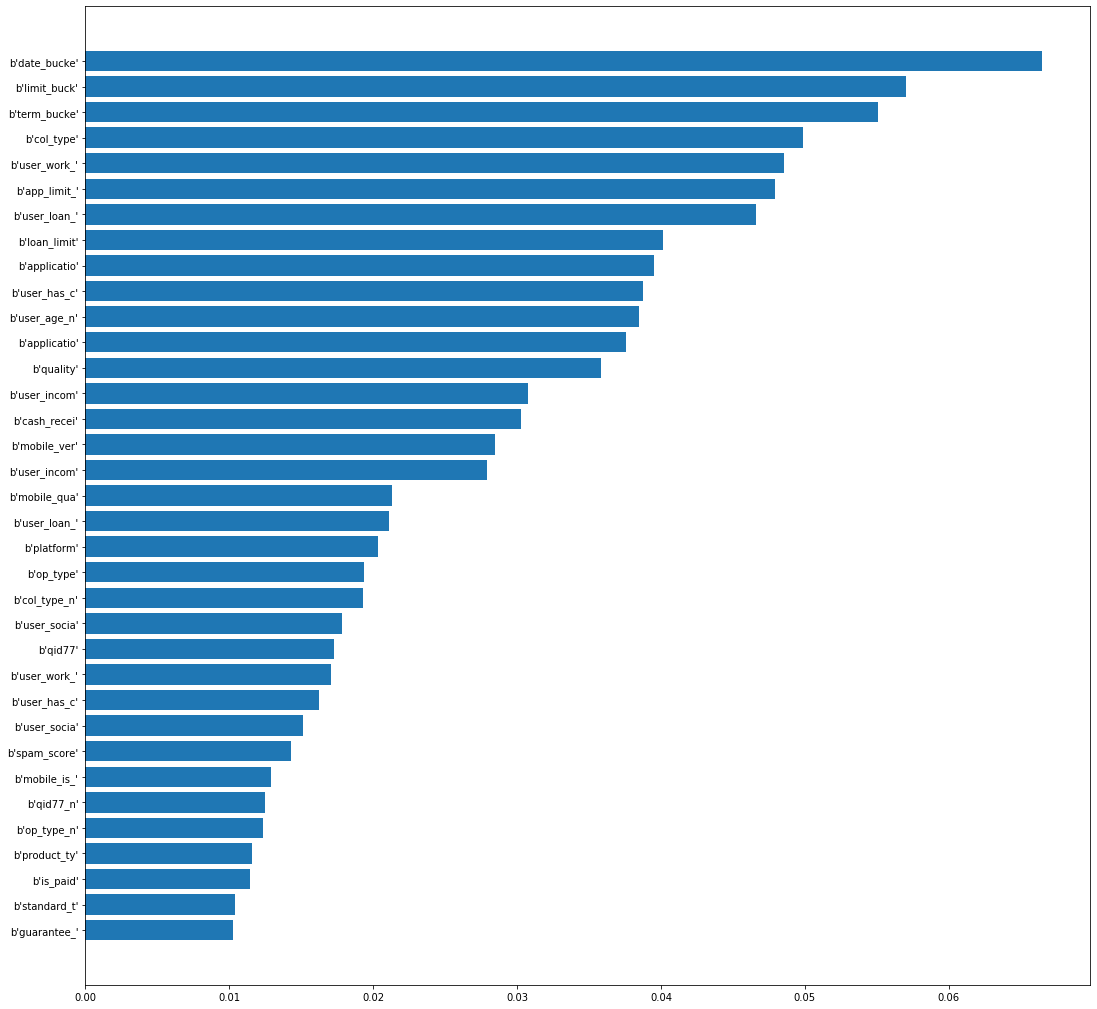

In [66]:
featureNames, featureScores = zip(*list(feature_sort))
print(featureNames)
print(featureScores)
plt.figure(figsize=(18,18))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
# plt.figure(figsize = (20,20))

In [50]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [51]:
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 44.8 s, sys: 7.04 s, total: 51.8 s
Wall time: 5h 3min 50s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [52]:
grid_search_forest.best_params_

{'criterion': 'gini', 'max_depth': 29, 'n_estimators': 90}

In [53]:
grid_search_forest.best_score_

0.8545680438269606

In [54]:
# get the training/test errors
print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The training error is: 0.06428
The test     error is: 0.14289


In [61]:
# feature_importance = list(zip(rf_data.columns, randomForest.feature_importances_))
# dtype = [('feature', 'S10'), ('importance', 'float')]
# feature_importance = np.array(feature_importance, dtype=dtype)
# feature_sort = np.sort(feature_importance, order='importance')[::-1]
# [i for (i, j) in feature_sort[0:5]]

In [62]:
# featureNames, featureScores = zip(*list(feature_sort))
# plt.figure(figsize=(18,18))
# plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
# plt.title('feature importance')

In [63]:
forest_final = grid_search_forest.best_estimator_
feature_importance = list(zip(rf_data.columns[1:], forest_final.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype = dtype)
feature_sort = np.sort(feature_importance, order='importance')#[::-1]

# The [::-1] above reverses the order of the list from ascending sort to descending




feature_sort

array([(b'quality', 0.01214027), (b'mobile_qua', 0.0130857 ),
       (b'user_incom', 0.01319542), (b'guarantee_', 0.01319712),
       (b'cash_recei', 0.01398787), (b'platform', 0.01425143),
       (b'col_type_n', 0.01542239), (b'qid77_n', 0.01588555),
       (b'mobile_ver', 0.01667038), (b'qid77', 0.01833034),
       (b'user_socia', 0.01835341), (b'spam_score', 0.01896564),
       (b'user_age_n', 0.01937582), (b'user_work_', 0.01970337),
       (b'standard_t', 0.02096914), (b'col_type', 0.02105548),
       (b'user_loan_', 0.02202266), (b'user_has_c', 0.02274813),
       (b'is_paid', 0.02684735), (b'user_work_', 0.03114535),
       (b'applicatio', 0.03150368), (b'user_incom', 0.03174006),
       (b'mobile_is_', 0.03373191), (b'op_type', 0.03385229),
       (b'user_socia', 0.03452102), (b'product_ty', 0.03620148),
       (b'app_limit_', 0.04055923), (b'user_has_c', 0.04101164),
       (b'loan_limit', 0.04105879), (b'op_type_n', 0.04169258),
       (b'date_bucke', 0.04339043), (b'user_loa

(b'quality', b'mobile_qua', b'user_incom', b'guarantee_', b'cash_recei', b'platform', b'col_type_n', b'qid77_n', b'mobile_ver', b'qid77', b'user_socia', b'spam_score', b'user_age_n', b'user_work_', b'standard_t', b'col_type', b'user_loan_', b'user_has_c', b'is_paid', b'user_work_', b'applicatio', b'user_incom', b'mobile_is_', b'op_type', b'user_socia', b'product_ty', b'app_limit_', b'user_has_c', b'loan_limit', b'op_type_n', b'date_bucke', b'user_loan_', b'limit_buck', b'term_bucke')
(0.012140268703915689, 0.013085696728141562, 0.01319541596988633, 0.013197120566381249, 0.013987868974841139, 0.01425143425988242, 0.01542239281221284, 0.01588555118169391, 0.016670383258926506, 0.01833034421058484, 0.01835341167692955, 0.018965640866302116, 0.019375824197646555, 0.019703370859425327, 0.020969139557214668, 0.021055482485789954, 0.022022663898641874, 0.022748134835186277, 0.026847349375946586, 0.031145352112692464, 0.031503677397863736, 0.03174005724486555, 0.03373191048503532, 0.0338522946

<BarContainer object of 34 artists>

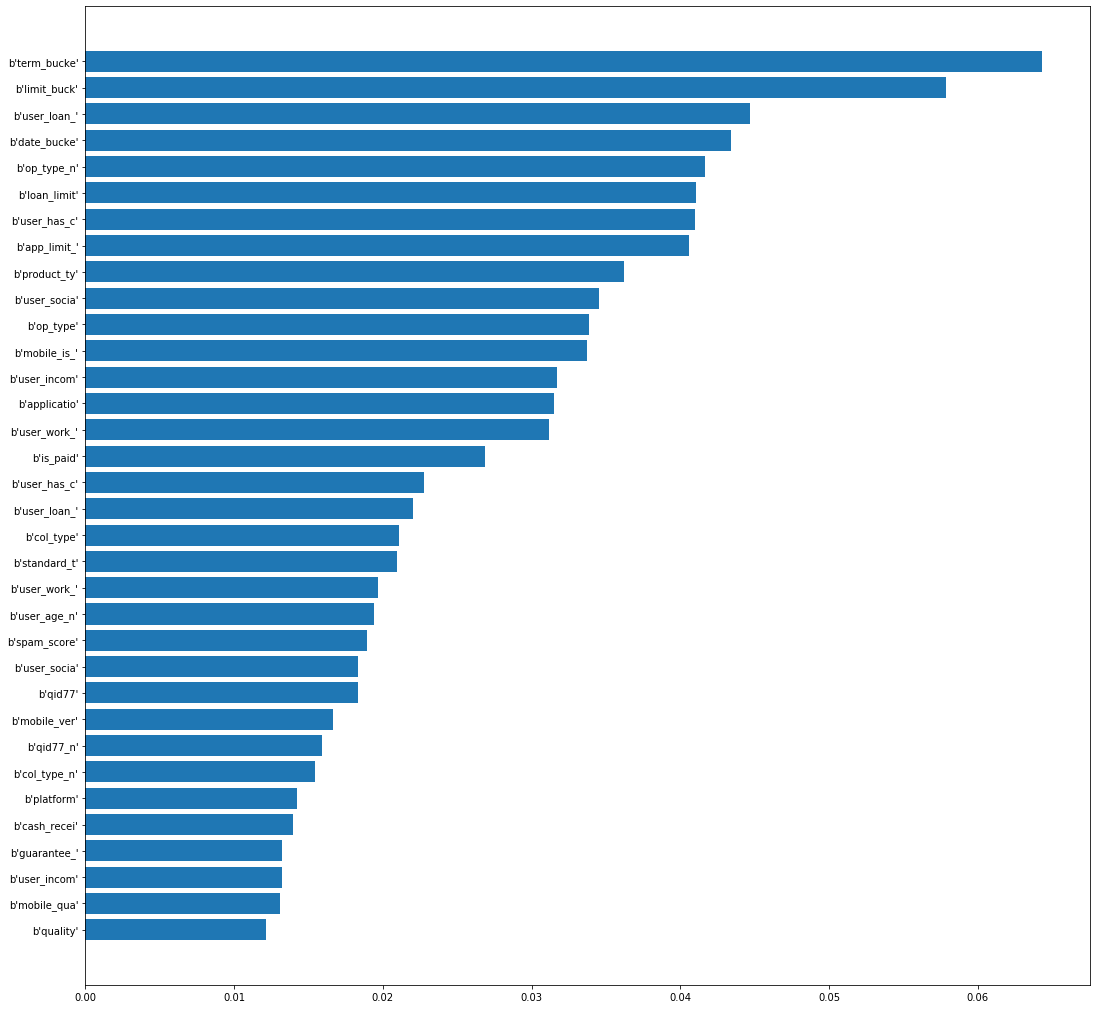

In [64]:
featureNames, featureScores = zip(*list(feature_sort))
print(featureNames)
print(featureScores)
plt.figure(figsize=(18,18))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)